In [1]:
# this notebook will plot Qb against drainage area

In [2]:
# first import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load data
data = pd.read_excel('all_data.xlsx')

# check it out
# data

In [4]:
# remove rows if bedload transport rate is NaN 
# or if discharge is 0 (normalizes by hydrology, use slope-dependent dataset)

data_tau = data[data['Bedload xport rate, constant tau_*c (m^3/s)'].notna()]
data_tauS = data[data['Bedload xport rate, S dependent tau_*c (m^3/s)'].notna()]
data_hydro = data_tauS[data_tauS['Discharge (m^3/s)'].notna()]

# check it out
# data_tau
data_hydro

,Secondary source,Primary source,Site name,Discharge (m^3/s),Discharge (m^3/yr),Drainage area (km^2),Drainage area (m^2),D50 (mm),D50 (m),Width (m),...,Slope,tau_*c (constant),tau_*c (slope dependent),tau_bf,tau_*bf,"Bedload xport rate, constant tau_*c (m^3/s)","Bedload xport rate, S dependent tau_*c (m^3/s)","Bedload xport rate, constant tau_*c (m^3/yr)","Bedload xport rate, S dependent tau_*c (m^3/yr)",Erosion rate (m/yr)
3,"Phillips et al., 2022","Agouridis et al., 2011 and Brockman, 2010",East Hickman Creek at Andover,1.1,3.465000e+07,4.09,4.090000e+06,15.2,0.0152,4.1,...,0.00580,0.0495,0.041395,22.759200,0.092504,0.001094,0.001418,3.447386e+04,4.466550e+04,NaN
4,"Phillips et al., 2022","Agouridis et al., 2011 and Brockman, 2010",UT to East Hickman Creek at Chilesburg,1.3,4.095000e+07,2.49,2.490000e+06,4.6,0.0046,4.2,...,0.00630,0.0495,0.042260,24.721200,0.332016,0.003143,0.003264,9.899829e+04,1.028283e+05,NaN
5,"Phillips et al., 2022","Agouridis et al., 2011 and Brockman, 2010",Cave Creek near Fort Springs,1.8,5.670000e+07,6.55,6.550000e+06,38.5,0.0385,5.3,...,0.00740,0.0495,0.043995,29.037600,0.046596,NaN,0.000085,NaN,2.672495e+03,NaN
6,"Phillips et al., 2022","Agouridis et al., 2011 and Brockman, 2010",North Elkhorn Creek at Man O War Rd.,1.7,5.355000e+07,5.70,5.700000e+06,30.1,0.0301,5.9,...,0.00730,0.0495,0.043845,35.806500,0.073492,0.001829,0.002512,5.760893e+04,7.913252e+04,NaN
7,"Phillips et al., 2022","Agouridis et al., 2011 and Brockman, 2010",Fourmile Creek at Polar Bridge,4.4,1.386000e+08,8.03,8.030000e+06,60.7,0.0607,8.0,...,0.01840,0.0495,0.055245,90.252000,0.091858,0.016659,0.013387,5.247445e+05,4.216874e+05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,"Phillips et al., 2022","Williams, 1978","PATTERSON CREEK NEAR HEADSVILLE, WV",91.8,2.891700e+09,567.00,5.670000e+08,12.0,0.0120,42.1,...,0.00070,0.0495,0.024399,17.716860,0.091212,0.007530,0.015266,2.372056e+05,4.808699e+05,NaN
749,"Phillips et al., 2022","Williams, 1978","South Chickamauga Creek, GA",69.4,2.186100e+09,644.00,6.440000e+08,13.0,0.0130,33.0,...,0.00250,0.0495,0.033541,75.537000,0.358974,0.134503,0.145040,4.236854e+06,4.568773e+06,NaN
750,"Phillips et al., 2022","Williams, 1978",Elk River near Prospect TN,668.0,2.104200e+10,4620.00,4.620000e+09,14.0,0.0140,69.0,...,0.00080,0.0495,0.025227,46.695600,0.206061,0.113092,0.140387,3.562398e+06,4.422194e+06,NaN
751,"Phillips et al., 2022","Williams, 1978","GREEN RIVER AT MUNFORDVILLE, KY",580.6,1.828890e+10,4636.00,4.636000e+09,21.0,0.0210,99.1,...,0.00085,0.0495,0.025612,58.452885,0.171962,0.206431,0.269687,6.502565e+06,8.495143e+06,NaN


In [5]:
# data for a one to one line
x = np.arange(1e1, 1e12, 1e10)
y = x

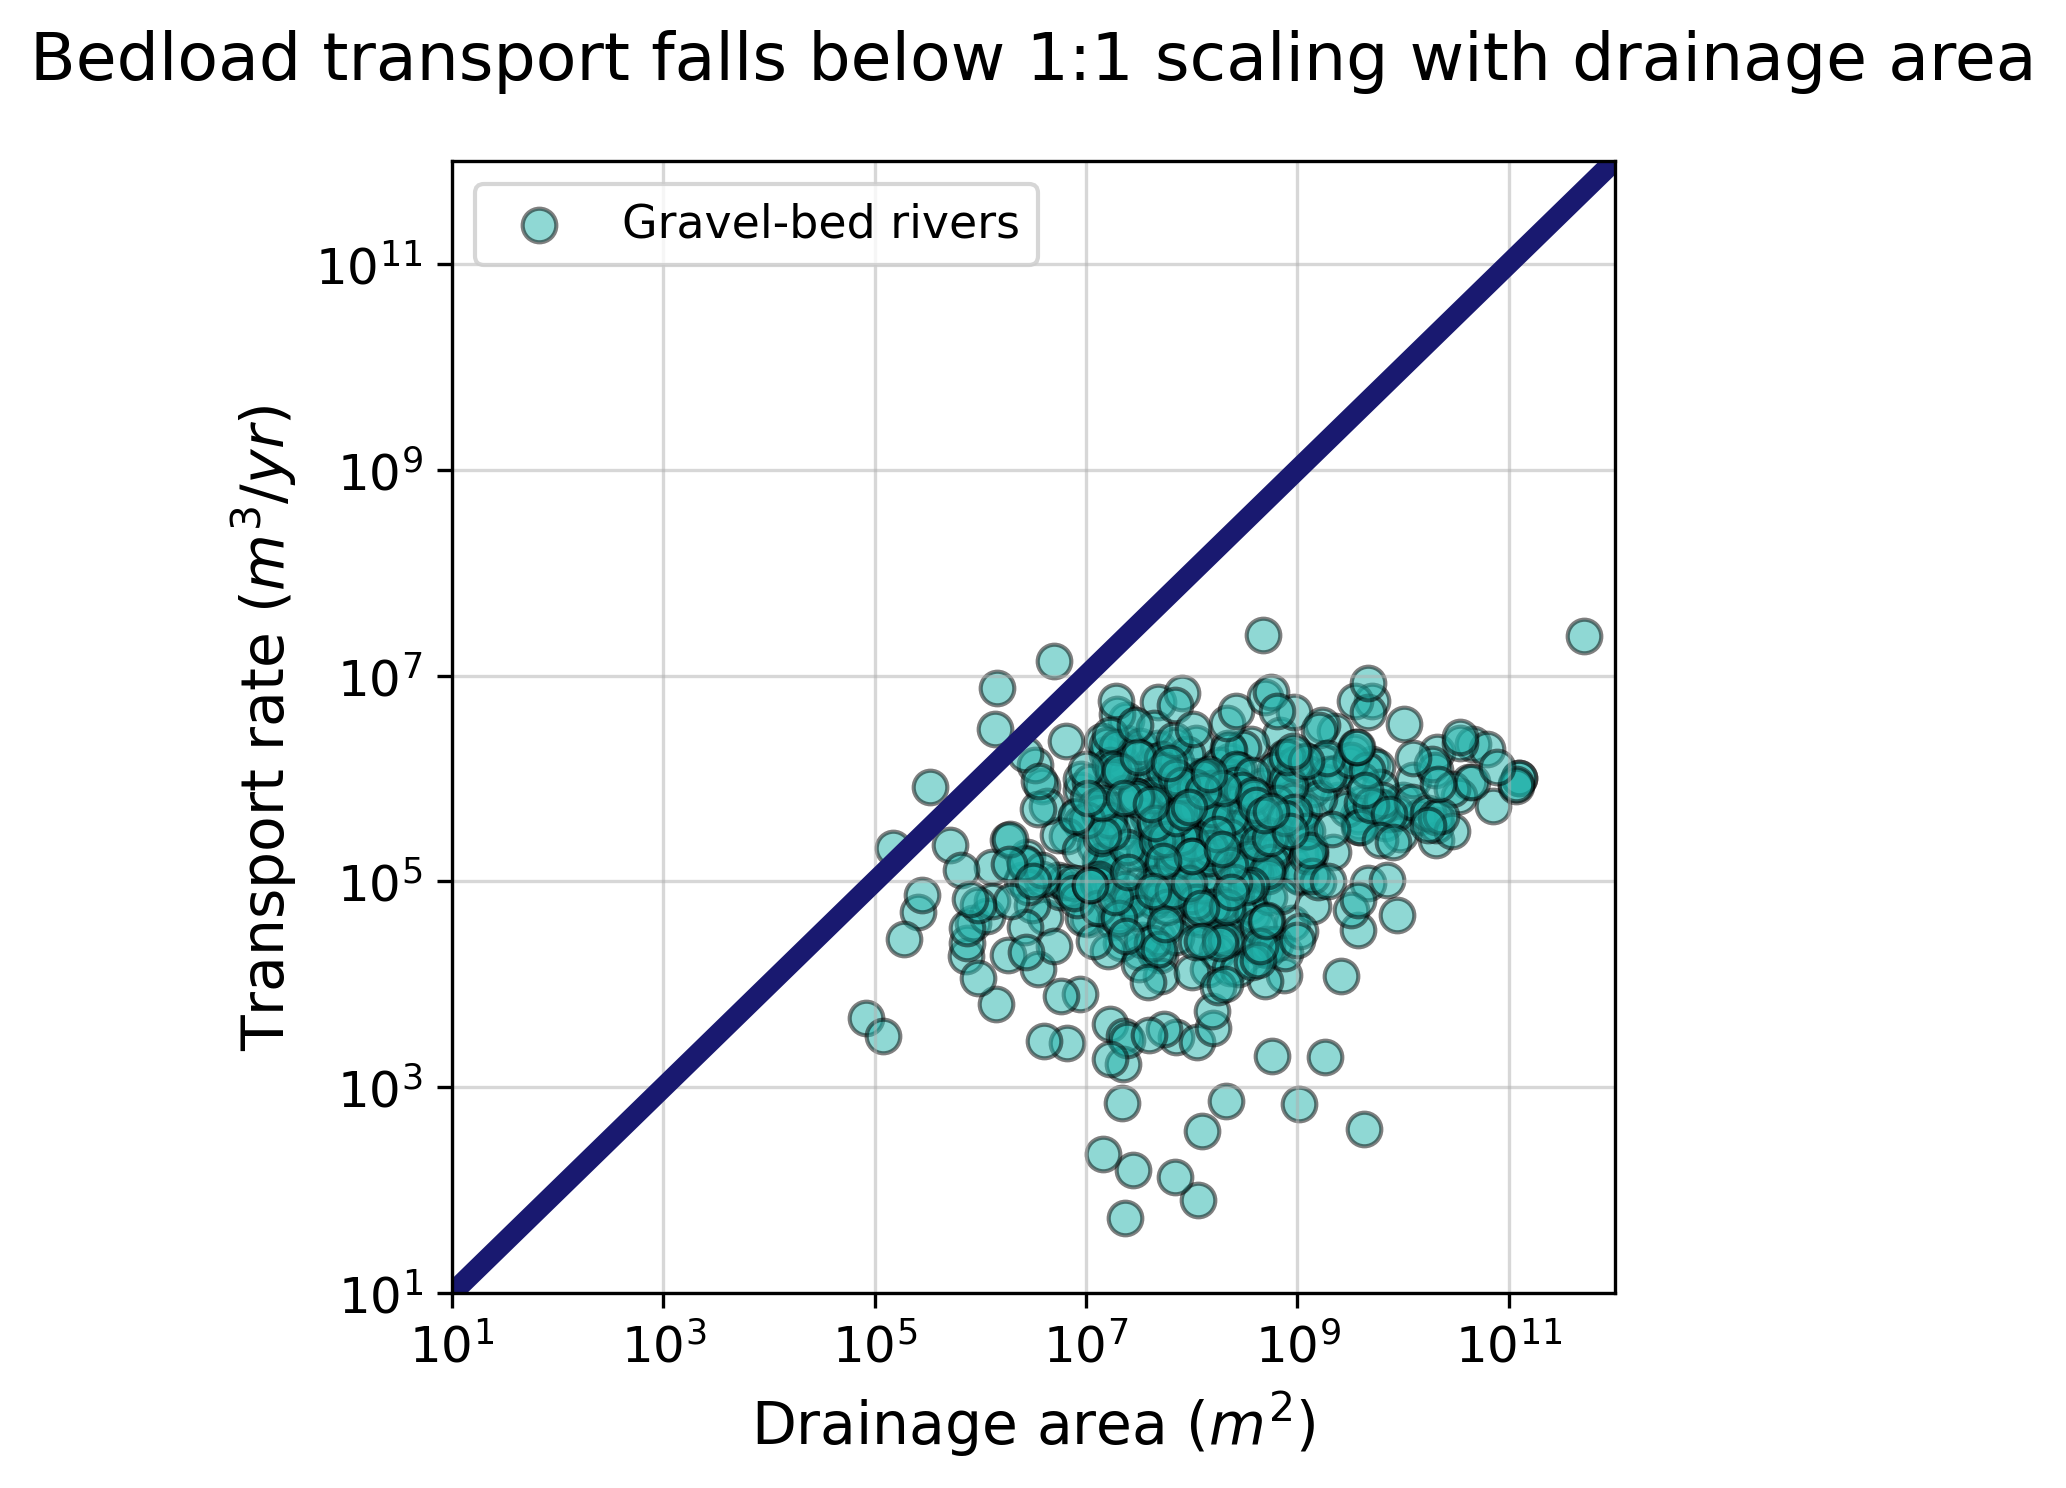

In [6]:
# Now make a figure

plt.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(1, figsize = (5, 5))

ax.scatter(data_tauS['Drainage area (m^2)'], data_tauS['Bedload xport rate, S dependent tau_*c (m^3/yr)'], label = 'Gravel-bed rivers', color = 'lightseagreen', alpha = 0.5, s = 65, edgecolors = 'black')
ax.plot(x, y, linewidth = 5, color = 'midnightblue')
# Plot regression line
# ax.plot(data_tauS['Drainage area (m^2)'], fit_eq, color="k", lw=2.5)
# ax.plot(data_tauS['Drainage area (m^2)'], fit_equation, color="k", lw=2.5)
ax.set_xlabel('Drainage area ($m^2$)', fontsize = 14)
ax.set_ylabel('Transport rate ($m^3/yr$)', fontsize = 14)
ax.set_title('Bedload transport falls below 1:1 scaling with drainage area', fontsize = 16, y=1.05)
ax.tick_params(axis="x", labelsize=12) 
ax.tick_params(axis="y", labelsize=12)
ax.legend(fontsize = 11)
ax.set_xlim(1e1, 1e12)
ax.set_ylim(1e1, 1e12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(alpha = 0.5)
plt.show()

In [7]:
# now we want to see if normalizing by hydrology helps show us any other trend

In [8]:
# first let's make shorter array names to work with
DA = data_hydro['Drainage area (m^2)'].to_numpy()
xport = data_hydro['Bedload xport rate, S dependent tau_*c (m^3/yr)'].to_numpy()
Q = data_hydro['Discharge (m^3/yr)'].to_numpy()

In [9]:
# and normalize by hydro
xport_norm = xport/Q

In [10]:
import scipy.stats

slope, inter, r_value, p_value, std_err = scipy.stats.linregress(np.log(DA), np.log(xport_norm))

In [11]:
a = np.linspace(1e5, 1e12, len(DA))

vals = inter * a**slope

In [12]:
r_2 = r_value**2

print("R squared: ", r_2)

R squared:  0.24730648688859935


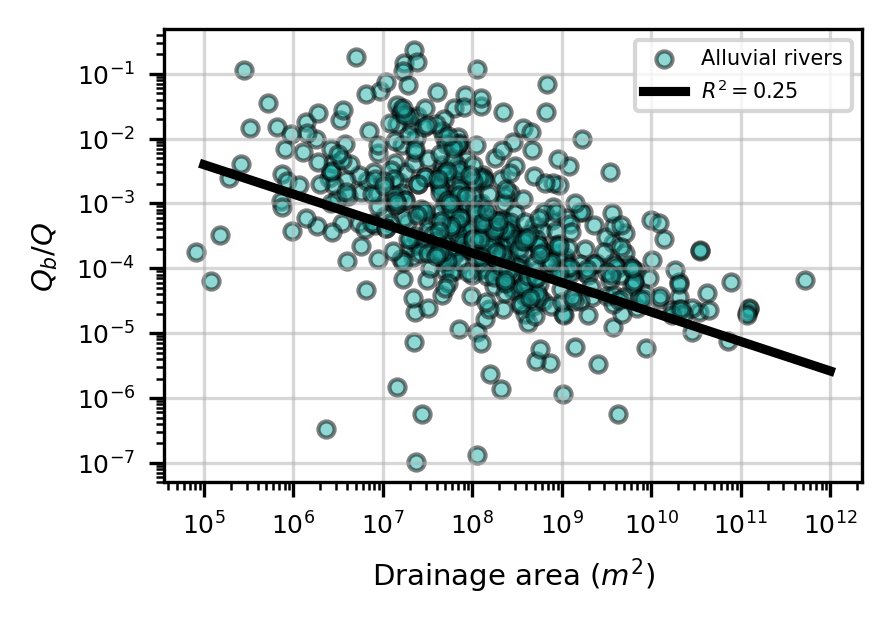

In [13]:
# And let's just see what happens if we divide transport rate by discharge

plt.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(1, figsize = (3, 2))

ax.scatter(data_hydro['Drainage area (m^2)'], data_hydro['Bedload xport rate, S dependent tau_*c (m^3/yr)']/data_hydro['Discharge (m^3/yr)'], label = 'Alluvial rivers', color = 'lightseagreen', alpha = 0.5, s = 15, edgecolors = 'black')
# ax.plot(x, y, linewidth = 5, color = 'midnightblue')
# Plot regression line
ax.plot(a, vals, color="k", lw=2.2, label = '$R^2 = 0.25$')
ax.set_xlabel('Drainage area ($m^2$)', fontsize = 7)
ax.set_ylabel('$Q_b/Q$', fontsize = 7)
# ax.set_title('Bedload transport falls below 1:1 scaling with drainage area', fontsize = 16, y=1.05)
ax.tick_params(axis="x", labelsize=6) 
ax.tick_params(axis="y", labelsize=6)
ax.legend(fontsize = 5)
# ax.set_xlim(1e1, 1e12)
# ax.set_ylim(1e1, 1e12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(alpha = 0.5)
plt.show()

In [23]:
# now try this again but exclude grains smaller than 2mm
# and just do big basins
# and check out just the ones that appear to be incising bedrock
# load data
# gdata = pd.read_excel('all_gravel_data_bigbasins.xlsx')
gdata = pd.read_excel('rock incising rivers.xlsx')

# check it out
# data

In [24]:
# remove rows if bedload transport is NaN
# use slope dependent critical shear
gdata_tauS = gdata[gdata['Bedload xport rate, S dependent tau_*c (m^3/s)'].notna()]
gdata_hydro = gdata_tauS[gdata_tauS['Discharge (m^3/s)'].notna()]

In [25]:
# now make shorter array names to work with
gDA = gdata_hydro['Drainage area (m^2)'].to_numpy()
gxport = gdata_hydro['Bedload xport rate, S dependent tau_*c (m^3/yr)'].to_numpy()
gQ = gdata_hydro['Discharge (m^3/yr)'].to_numpy()

In [26]:
# and normalize by hydro
gxport_norm = gxport/gQ

In [27]:
# do rsquared stuff
gslope, ginter, gr_value, gp_value, gstd_err = scipy.stats.linregress(np.log(gDA), np.log(gxport_norm))

In [32]:
ga = np.linspace(1e8, 1e9, len(gDA))

gvals = ginter * ga**gslope

In [33]:
gr_2 = gr_value**2

print("R squared with gravel-bed only: ", gr_2)

R squared with gravel-bed only:  0.016572060445691157


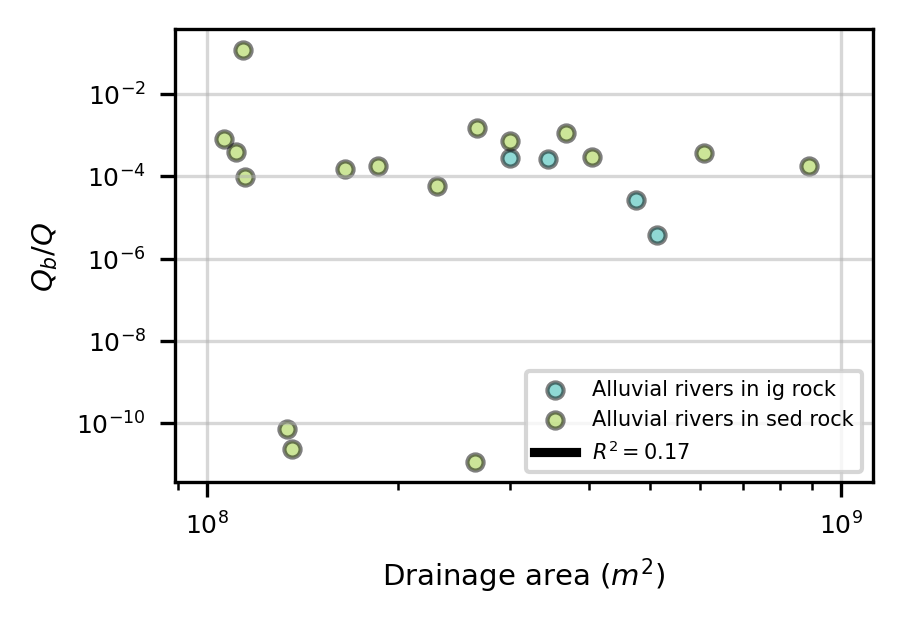

In [34]:
# yikes
# ah well
# time to visualize

plt.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(1, figsize = (3, 2))

ax.scatter(gdata_hydro['Drainage area (m^2)'][0:4], gdata_hydro['Bedload xport rate, S dependent tau_*c (m^3/yr)'][0:4]/gdata_hydro['Discharge (m^3/yr)'][0:4], label = 'Alluvial rivers in ig rock', color = 'lightseagreen', alpha = 0.5, s = 15, edgecolors = 'black')
ax.scatter(gdata_hydro['Drainage area (m^2)'][4:], gdata_hydro['Bedload xport rate, S dependent tau_*c (m^3/yr)'][4:]/gdata_hydro['Discharge (m^3/yr)'][4:], label = 'Alluvial rivers in sed rock', color = 'yellowgreen', alpha = 0.5, s = 15, edgecolors = 'black')
# ax.plot(x, y, linewidth = 5, color = 'midnightblue')
# Plot regression line
ax.plot(ga, gvals, color="k", lw=2.2, label = '$R^2 = 0.17$')
ax.set_xlabel('Drainage area ($m^2$)', fontsize = 7)
ax.set_ylabel('$Q_b/Q$', fontsize = 7)
# ax.set_title('Bedload transport falls below 1:1 scaling with drainage area', fontsize = 16, y=1.05)
ax.tick_params(axis="x", labelsize=6) 
ax.tick_params(axis="y", labelsize=6)
ax.legend(fontsize = 5)
# ax.set_xlim(1e1, 1e12)
# ax.set_ylim(1e1, 1e12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(alpha = 0.5)
plt.show()